In [8]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [9]:
data = pd.read_pickle("data/hand_gestures.pkl")

In [10]:
y = data.pop('label')
X = data
y = LabelEncoder().fit_transform(y)
y

array([ 0,  0,  0, ..., 35, 35, 35])

In [11]:
y.shape

(2515,)

In [12]:
# spliting the data: using stratified randim sampling since the data is well balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, shuffle = True, stratify = y)

In [13]:
rnd_clf = RandomForestClassifier(n_estimators=600, n_jobs=-1)

In [14]:
param_grid = [{'min_samples_leaf': [5, 10, 20], 'max_depth': [5, 8, 12]}]

grid_search = GridSearchCV(rnd_clf, param_grid, cv=3,
                            scoring='accuracy',
                            return_train_score=True,
                            refit = True)

In [15]:
best_model = grid_search.fit(X_train, y_train)

0.9562624254473161
Classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       1.00      1.00      1.00        14
           2       0.92      0.79      0.85        14
           3       1.00      1.00      1.00        14
           4       0.93      0.93      0.93        14
           5       0.93      0.93      0.93        14
           6       0.80      0.86      0.83        14
           7       0.93      1.00      0.97        14
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        14
           A       1.00      1.00      1.00        14
           B       1.00      0.86      0.92        14
           C       1.00      1.00      1.00        14
           D       0.93      0.93      0.93        14
           E       1.00      1.00      1.00        14
           F       1.00      1.00      1.00        14
           G       1.00      1.00      1

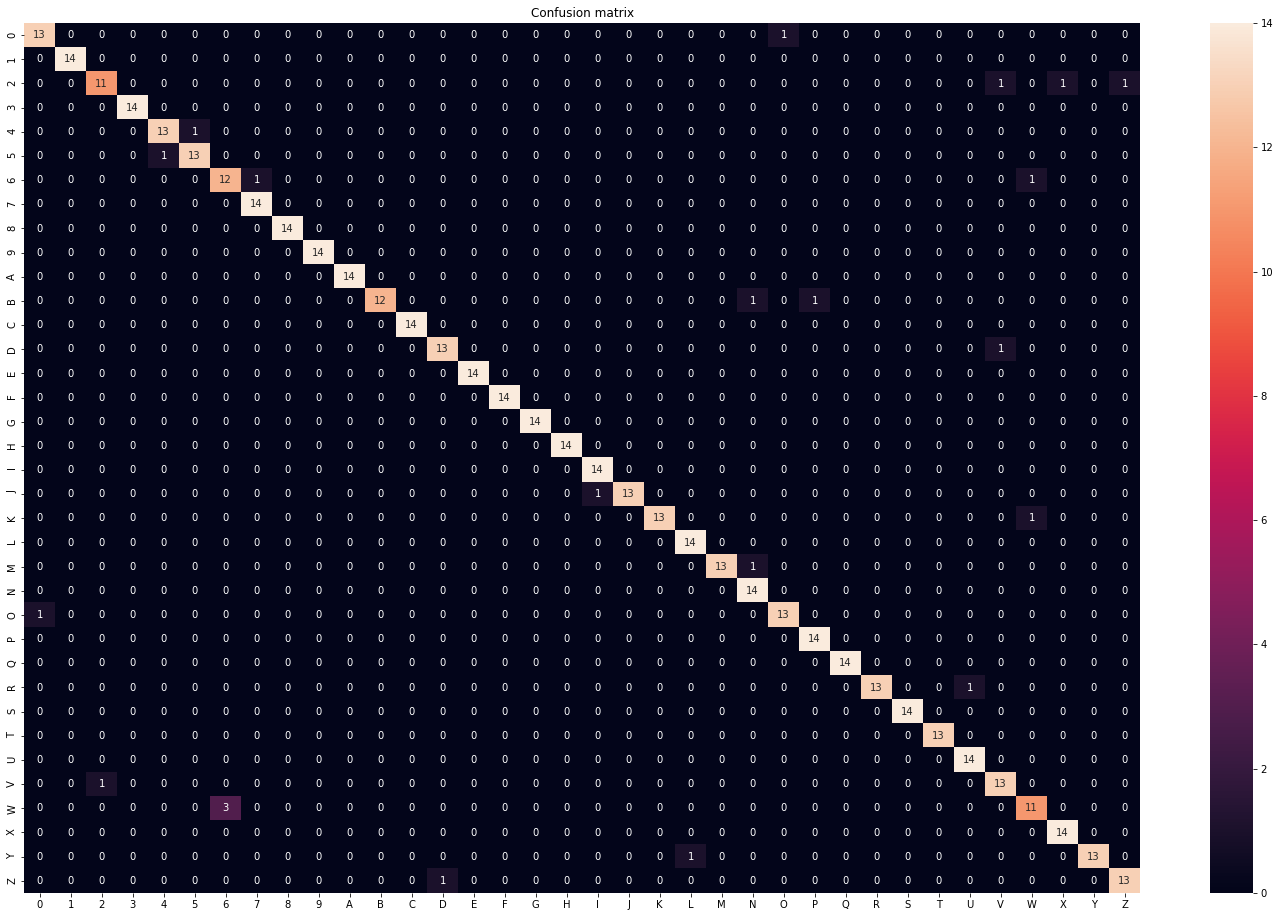

In [16]:
from utils.report import report

y_pred_test = best_model.predict(X_test)

report(y_test, y_pred_test)

In [18]:
# saving the model

import joblib

filename = r'models/random_forest.sav'
joblib.dump(best_model, filename)

['models/random_forest.sav']